<a href="https://colab.research.google.com/github/johnnyclayton/happiness_report/blob/main/Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Happiness Report 2022**

In [43]:
# libraries required
import pandas as pd
from sklearn import linear_model
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

## Importing data

In [46]:
data = pd.read_csv("https://github.com/johnnyclayton/happiness_report/blob/main/2022.csv?raw=true")
data.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [3]:
# dimensions
data.shape

(146, 12)

## Data cleansing

In [4]:
# looking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RANK                          146 non-null    int64  
 1   Country                       146 non-null    object 
 2   Happiness score               146 non-null    float64
 3   Whisker-high                  146 non-null    float64
 4   Whisker-low                   146 non-null    float64
 5   Dystopia (1.83) + residual    146 non-null    float64
 6   GDP per capita                146 non-null    float64
 7   Social support                146 non-null    float64
 8   Healthy life expectancy       146 non-null    float64
 9   Freedom to make life choices  146 non-null    float64
 10  Generosity                    146 non-null    float64
 11  Perceptions of corruption     146 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 13.8+ KB


In [47]:
# removing unwanted columns
data = data.drop(['RANK','Dystopia (1.83) + residual','Whisker-high','Whisker-low'],axis=1)
data.head()

,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419


Text(0.5, 1.0, 'Top 10 Happiest Countries')

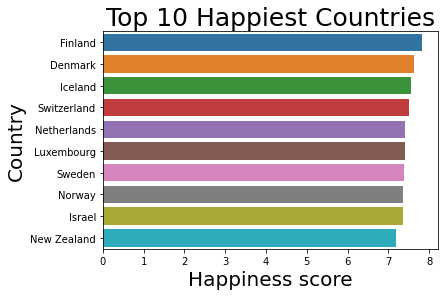

In [42]:
top = data.sort_values(['Happiness score'],ascending = 0)[:10]
ax = sns.barplot(x = 'Happiness score' , y = 'Country' , data = top)
ax.set_xlabel('Happiness score', size = 20)
ax.set_ylabel('Country', size = 20)
ax.set_title("Top 10 Happiest Countries", size = 25)

## Correlation between variables

&nbsp;&nbsp;&nbsp;&nbsp;The happiness score is highly correlated to the gdp per capita and social support.

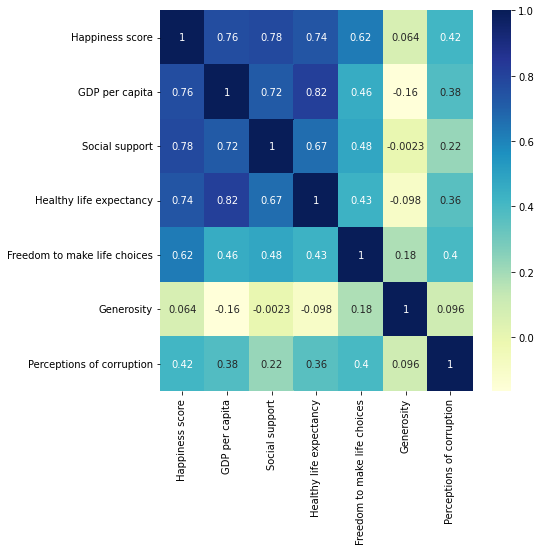

In [17]:
plt.rcParams['figure.figsize'] = (7,7)
sns.heatmap(data.corr(),cmap="YlGnBu",annot = True)
plt.show()

## Pairwise relationship between variables.

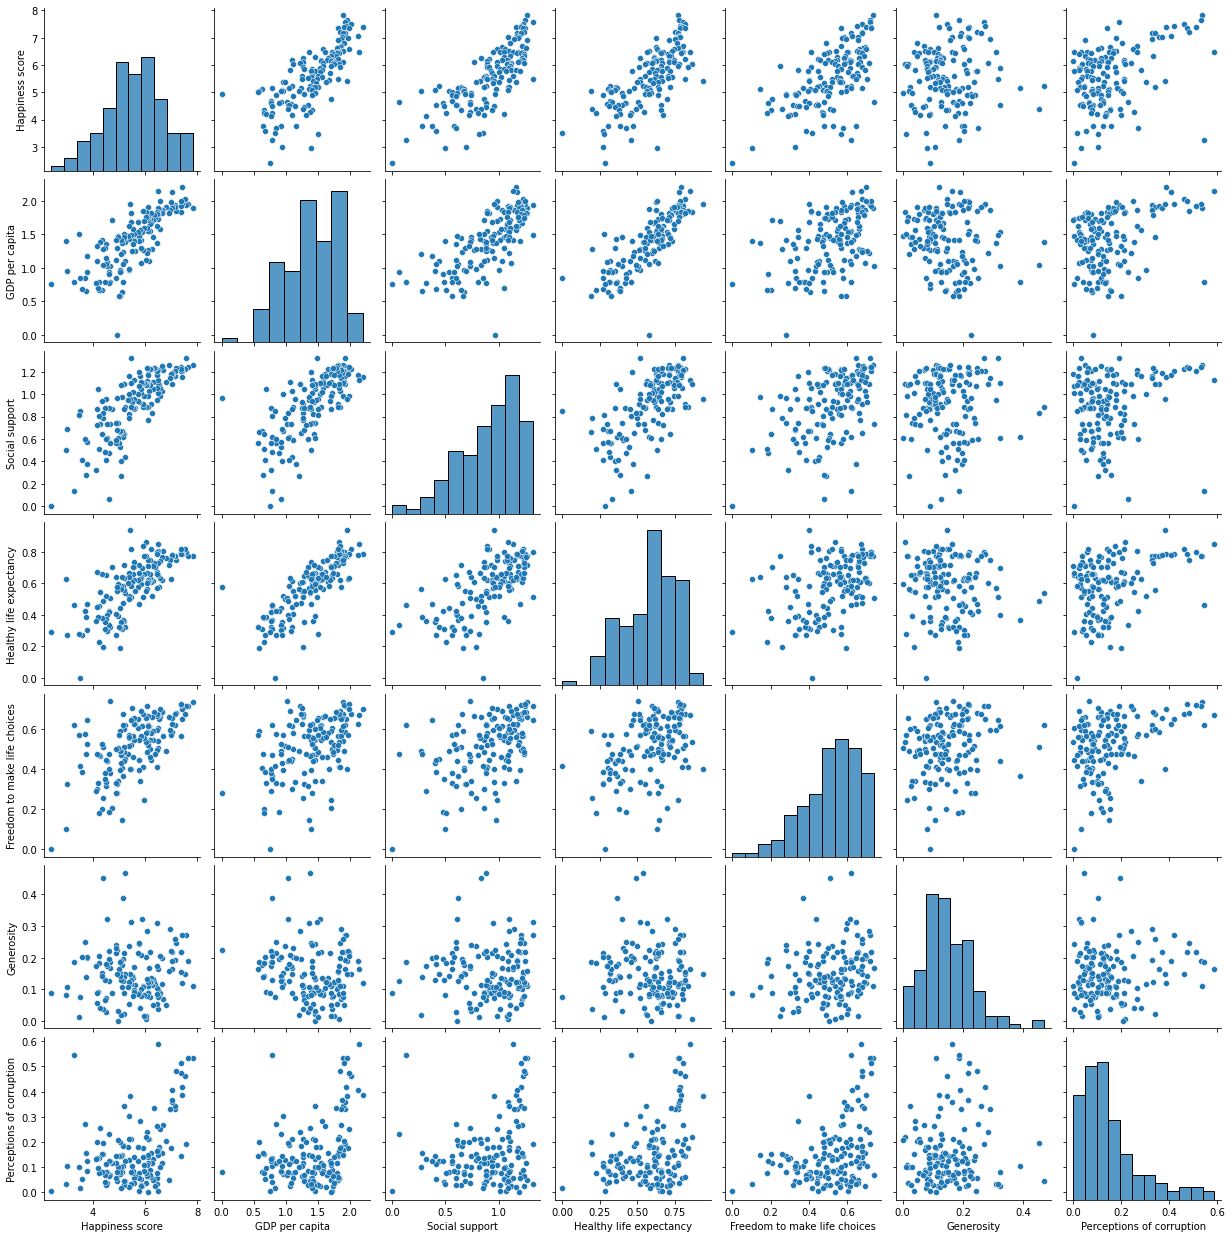

In [11]:
sns.pairplot(data)

## Top 10 countries for other attributes

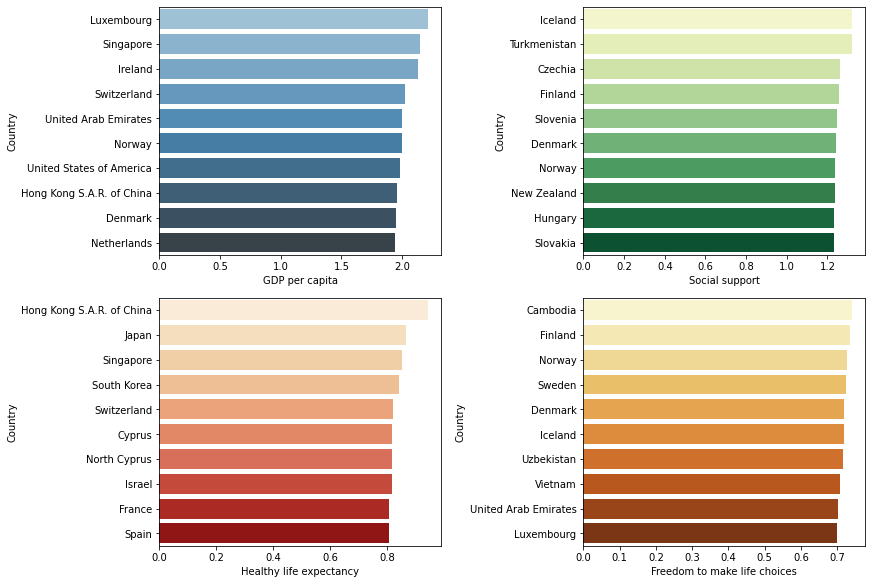

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country',data=data.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country',data=data.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country',data=data.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country',data=data.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

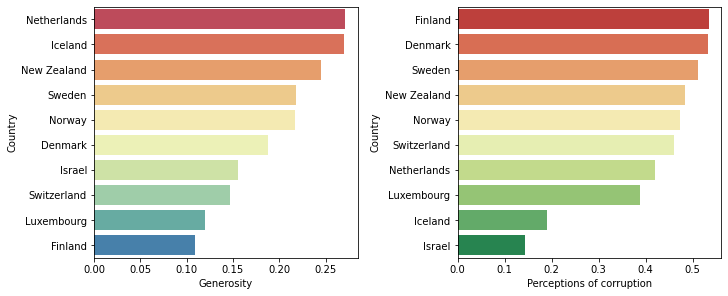

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country',data=data.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country',data=data.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

## Interactive maps

In [73]:
map_plot = dict(type = 'choropleth', 
                locations = data['Country'],
                locationmode = 'country names',
                z = data['Happiness score'], 
                text = data['Country'],
                colorscale = 'blugrn',)
layout = dict(title = 'Happiest Countries In The World')
choromap = go.Figure(data = [map_plot],layout=layout)
choromap.show()

In [84]:
map_plot = dict(type = 'choropleth', 
                locations = data['Country'],
                locationmode = 'country names',
                z = data['Healthy life expectancy'], 
                text = data['Country'],
                colorscale = 'Blues',)
layout = dict(title = 'Healthiest Countries In The World')
choromap = go.Figure(data = [map_plot],layout=layout)
choromap.show()

In [70]:
map_plot = dict(type = 'choropleth', 
                locations = data['Country'],
                locationmode = 'country names',
                z = data['GDP per capita'], 
                text = data['Country'],
                colorscale = 'Purples',)
layout = dict(title = 'Wealthiest Countries In The World')
choromap = go.Figure(data = [map_plot],layout=layout)
choromap.show()